# Microsoft Movie Studio
Author: Chris Mukiri
DSF-PT-05
Data Science

#### Overview:
In this project, the goal is to assist Microsoft in entering the movie industry by providing actionable insights based on exploratory data analysis (EDA). The business problem is to determine what types of films are currently performing well at the box office, ultimately guiding Microsoft's new movie studio in making informed decisions on film production. The project involves data analysis on various factors, including movie genres, production budgets, box office earnings, and release dates, to answer key data questions. The data is sourced from various movie industry datasets, including information about movie titles, budgets, earnings, genres, and ratings.

#### Data Understanding:
The data used for this project encompasses information from multiple sources, including movie titles, production budgets, domestic and worldwide gross earnings, release dates, genres, and audience ratings. The dataset represents a diverse range of movies in terms of genres, budgets, and box office performance. The primary target variable is the box office earnings, both domestic and worldwide. Key variables under consideration include genres, budgets, release dates, and audience ratings.

#### Data Preparation:


In [4]:
import pandas as pd

# Read the CSV file into a DataFrame
df1 = pd.read_csv('bom.movie_gross.csv')
df2= pd.read_csv('tn.movie_budgets.csv')
df3= pd.read_csv('title.ratings.csv')
df4= pd.read_csv('title.basics.csv')

In [28]:
# Data cleaning 
# Drop rows with missing values
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)
df4.dropna(inplace=True)

In [29]:
# Remove duplicate rows
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)
df3.drop_duplicates(inplace=True)
df4.drop_duplicates(inplace=True)

In [45]:
# Save the cleaned DataFrames to new CSV files
df1.to_csv('cleaned_bom_movie_gross.csv', index=False)
df2.to_csv('cleaned_movie_budgets.csv', index=False)
df3.to_csv('cleaned_title_ratings.csv', index=False)
df4.to_csv('cleaned_title_basics.csv', index=False)


#### Data Modeling:
Data Analysis:

We rank the data, getting the top 20 earners domestically and worldwide so as to see if there's a connection between those and production budget.

In [50]:
# Sort the DataFrame by domestic gross in descending order
top_20_domestic = df2.sort_values(by='domestic_gross', ascending=False).head(20)

# Sort the DataFrame by worldwide gross in descending order
top_20_worldwide = df2.sort_values(by='worldwide_gross', ascending=False).head(20)

# Print the top 20 domestic gross earners
print("Top 20 highest domestic gross earners:")
print(top_20_domestic)

# Print the top 20 worldwide gross earners
print("\nTop 20 highest worldwide gross earners:")
print(top_20_worldwide)

Top 20 highest domestic gross earners:
      id  release_date                                 movie  \
5      6  Dec 18, 2015  Star Wars Ep. VII: The Force Awakens   
0      1  Dec 18, 2009                                Avatar   
41    42  Feb 16, 2018                         Black Panther   
6      7  Apr 27, 2018                Avengers: Infinity War   
42    43  Dec 19, 1997                               Titanic   
33    34  Jun 12, 2015                        Jurassic World   
26    27   May 4, 2012                          The Avengers   
4      5  Dec 15, 2017     Star Wars Ep. VIII: The Last Jedi   
43    44  Jun 15, 2018                         Incredibles 2   
74    75  Jul 18, 2008                       The Dark Knight   
44    45  Dec 16, 2016          Rogue One: A Star Wars Story   
134   35  Mar 17, 2017                  Beauty and the Beast   
45    46  Jun 17, 2016                          Finding Dory   
302    4  May 19, 1999   Star Wars Ep. I: The Phantom Menace   
3

Even though it is not the only contributing factor, movies whose production budget was higher tended to perform better in terms of income generation.  

In [52]:


# Sort the DataFrame by production budget in ascending order
lowest_20_production_budget = df2.sort_values(by='production_budget', ascending=True).head(20)

# Print the 20 movies with the lowest production budget
print("20 movies with the lowest production budget:")
print(lowest_20_production_budget)


20 movies with the lowest production budget:
      id  release_date                            movie  production_budget  \
5233  82   Aug 5, 2005                My Date With Drew               1100   
5232  80  Jul 13, 2005    Return to the Land of Wonders               5000   
5231  79   Apr 2, 1999                        Following               6000   
5227  74  Feb 26, 1993                      El Mariachi               7000   
5230  77  Dec 31, 2004                  The Mongol King               7000   
5229  76  May 26, 2006                           Cavite               7000   
5228  75   Oct 8, 2004                           Primer               7000   
5226  73  Jan 13, 2012                        Newlyweds               9000   
5225  71  Aug 14, 2008  The Rise and Fall of Miss Thang              10000   
5224  70   Apr 1, 1996                             Bang              10000   
5223  69  May 28, 2004                   On the Downlow              10000   
5222  68   Jul 6, 2

It is also noted here that those with low budgets performed poorly but not necessarily all of them.

In [57]:
# Read the cleaned DataFrames
df3 = pd.read_csv('cleaned_title_ratings.csv')
df4 = pd.read_csv('cleaned_title_basics.csv')

# Merge the DataFrames based on the 'tconst' column
merged_df = df4.merge(df3, on='tconst', how='inner')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_title_data.csv', index=False)

In [54]:

# Read the merged DataFrame
merged_df = pd.read_csv('merged_title_data.csv')  # Use the merged DataFrame

# Sort the DataFrame by averagerating in descending order and select the top 20
top_20_highest_rated = merged_df.nlargest(20, 'averagerating')

# Print the top 20 highest-rated shows
print("Top 20 highest-rated shows:")
print(top_20_highest_rated)


Top 20 highest-rated shows:
           tconst                                      primary_title  \
610    tt10176328     Exteriores: Mulheres Brasileiras na Diplomacia   
763    tt10378660          The Dark Knight: The Ballad of the N Word   
8948    tt1770682                               Freeing Bernie Baran   
24816   tt2632430                              Hercule contre Hermès   
38900   tt4109192                              I Was Born Yesterday!   
45207   tt4960818                                    Revolution Food   
46112   tt5089804                    Fly High: Story of the Disc Dog   
48436   tt5390098                The Paternal Bond: Barbary Macaques   
54672   tt6295832                              Requiem voor een Boom   
57886   tt6991826    A Dedicated Life: Phoebe Brand Beyond the Group   
58850   tt7227500  Ellis Island: The Making of a Master Race in A...   
59019   tt7259300                                     Calamity Kevin   
63823   tt8730716                   

From the top 20 highest rated shows only 4 of them aren't documentaries meaning that documentaries are preffered.

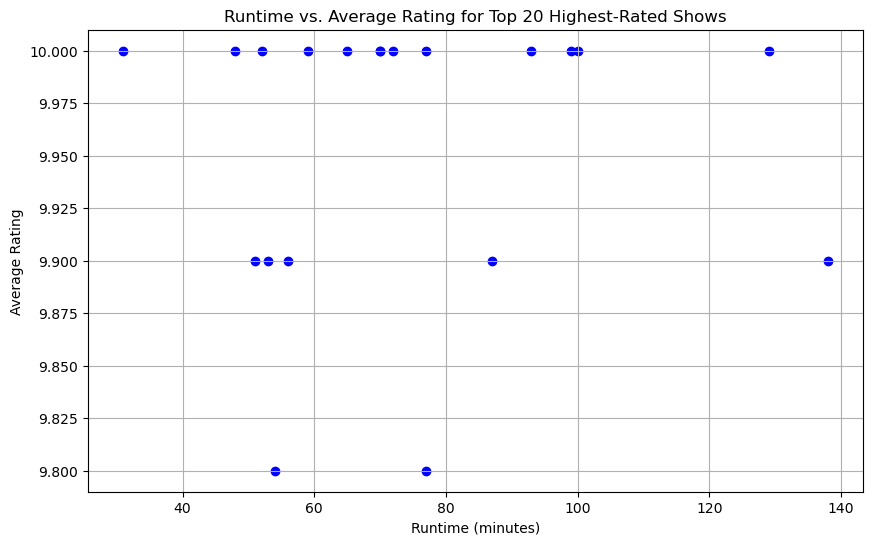

In [59]:

import matplotlib.pyplot as plt




# Extract the 'runtime_minutes' and 'averagerating' columns
runtime = top_20_highest_rated['runtime_minutes']
rating = top_20_highest_rated['averagerating']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(runtime, rating, color='blue', marker='o')
plt.title('Runtime vs. Average Rating for Top 20 Highest-Rated Shows')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.grid(True)



plt.show()


From this we see that runtime minutes do not co-relate with the average rating as a movie can have a short runtime but a high rating.

Text(0, 0.5, 'Amount in Billions')

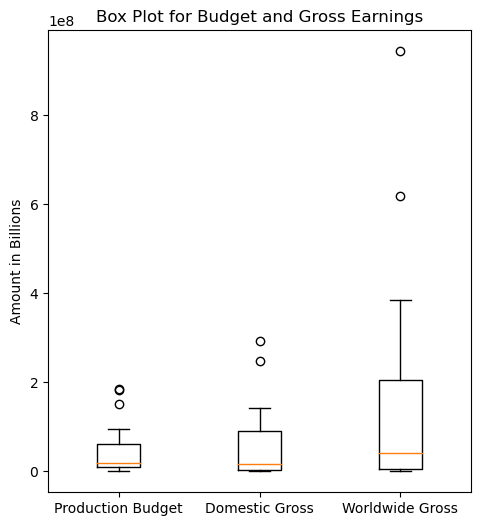

In [66]:
import random

# Read the cleaned movie budgets CSV file
df = pd.read_csv('cleaned_movie_budgets.csv')

# Sample 20 data points for each case
sampled_df = df.sample(n=20, random_state=42)

# Box Plot for Budget and Gross Earnings
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot([sampled_df['production_budget'], sampled_df['domestic_gross'], sampled_df['worldwide_gross']],
            labels=['Production Budget', 'Domestic Gross', 'Worldwide Gross'])
plt.title('Box Plot for Budget and Gross Earnings')
plt.ylabel('Amount in Billions')

High production budget, high worldwide gross.

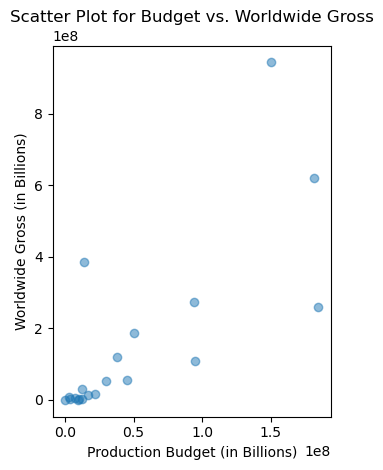

In [68]:
# Scatter Plot for Budget vs. Earnings
plt.subplot(1, 2, 2)
plt.scatter(sampled_df['production_budget'], sampled_df['worldwide_gross'], alpha=0.5)
plt.title('Scatter Plot for Budget vs. Worldwide Gross')
plt.xlabel('Production Budget (in Billions)')
plt.ylabel('Worldwide Gross (in Billions)')

plt.tight_layout()
plt.show()

High production budget better chances of high worlwide gross. 

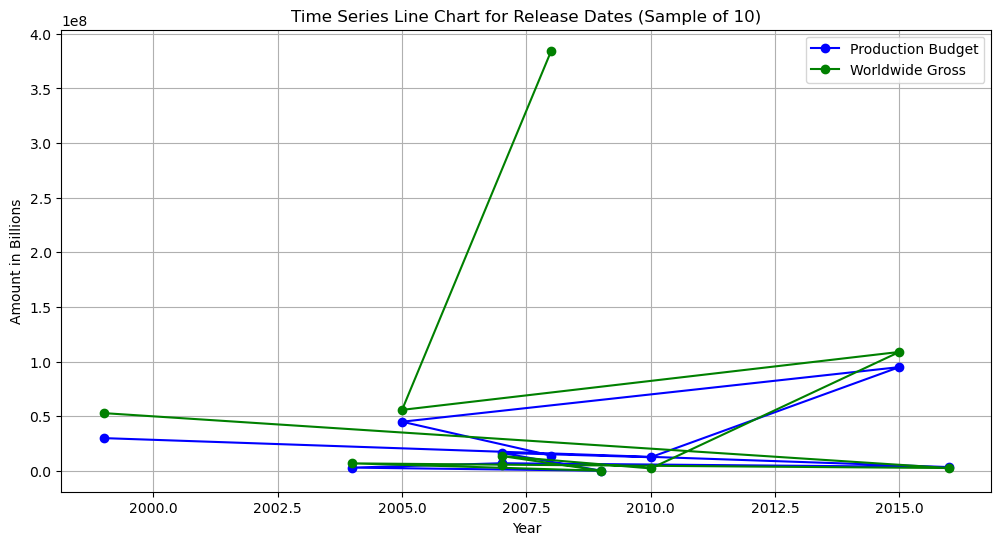

In [70]:
# Sample 10 data points for the Time Series Line Chart
sampled_df = df.sample(n=10, random_state=42)

# Time Series Line Chart for Release Dates
sampled_df['release_date'] = pd.to_datetime(sampled_df['release_date'])
sampled_df['year'] = sampled_df['release_date'].dt.year

plt.figure(figsize=(12, 6))
plt.plot(sampled_df['year'], sampled_df['production_budget'], label='Production Budget', marker='o', linestyle='-', color='b')
plt.plot(sampled_df['year'], sampled_df['worldwide_gross'], label='Worldwide Gross', marker='o', linestyle='-', color='g')
plt.title('Time Series Line Chart for Release Dates (Sample of 10)')
plt.xlabel('Year')
plt.ylabel('Amount in Billions')
plt.legend()
plt.grid()

plt.show()

#### Recommendations:
1.Consider investing in blockbuster movies, as there is a general trend of better income generation for such movies. However, this should not limit the studio from exploring opportunities with lower budget films.
2.Explore the documentary genre, as it is preferred among the top-rated shows.
3.Take into account that the runtime of a movie does not strongly correlate with its average rating, and shorter movies can also perform well. So it boils down to the prefference of the studio the runtime.

This information can help in capitalising of the movie industry.